<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/IndividualParties/RJD1Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 231, done.
remote: Total 231 (delta 0), reused 0 (delta 0), pack-reused 231
Receiving objects: 100% (231/231), 16.75 MiB | 39.44 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [ ]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-10"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#TejashwiYadav ")  
           
data1 = list(zip(text))
df1 = pd.DataFrame(data =data1, columns =["Tweet"])

df1.to_csv('rjd1.csv') 


Streaming output truncated to the last 5000 lines.
🔺156 - 169  Mahagathbandhan 
🔻 70 - 88  BJP + JDU
🔺05 -.08  LJP.
🔻06 - 11…
<--------------------------------------------------->
582
RT @suryapsingh_IAS: Bihar polls are almost over, Exit polls are about to begin. Let them forecast anything, Nitish is out and #TejashwiYad…
<--------------------------------------------------->
583
RT @suryapsingh_IAS: Bihar polls are almost over, Exit polls are about to begin. Let them forecast anything, Nitish is out and #TejashwiYad…
<--------------------------------------------------->
584
RT @sandipGopani_: Salutes to the awared and revolutionary people of #Bihar who has kept aside the politics of #Jumla, and exercised their…
<--------------------------------------------------->
585
Tejaswi will have to undo the mistakes made by his seniors in the past - Bihar needs education and jobs ..it has hu… https://t.co/wk4SeaLJSv
<--------------------------------------------------->
586
RT @DogawithINC: Few 

# **Importing Libraries**

In [ ]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning** **RJDDataset1**

```
# length of the dataset11
```



In [ ]:
tweets_list = df1['Tweet'].tolist()
len(tweets_list)

2836

# Removing duplicate tweets if any

In [ ]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

751

```
No of duplicate tweets
```

In [ ]:
df1['Tweet'].duplicated().sum()

2085

In [ ]:
df1 = df1.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df1.shape

(751, 1)

`Removed all the dupliactes`



# **Removing Emojis**


In [ ]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df1['Processed_Tweet']=df1.Tweet.apply(remove_emoji)

From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet'[link text](https://)

In [ ]:
count = 0
for i in df1['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df1.drop(df1.loc[df1['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

222

In [ ]:
df1.shape

(529, 2)

In [ ]:
df1['Processed_Tweet']

1      As per an exit poll conducted by Today’s Chana...
3      @aajtak The people of Bihar are going to give ...
5      Tejashwi Yadav | The cricketer-turned-heir app...
7      @yadavtejashwi Heartbeat of young heart Warmes...
9      Tejashwi Yadav winning Bihar and his old team ...
                             ...                        
745    Can Tejashwi be Bihar's Kejriwal ?\nNot only B...
746    Voter in Bihar is looking for a change- an @Ar...
747    @yadavtejashwi Tejashwi yadav popularity in th...
748    Decisive lead for #Tejashwi? #BharElections202...
749    @ArvindKejriwal ji that's true you should have...
Name: Processed_Tweet, Length: 529, dtype: object

# **Removing Username**

In [ ]:
df1['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df1['Processed_Tweet']] #remove usernames
df1['Processed_Tweet']

1      As per an exit poll conducted by Today’s Chana...
3        The people of Bihar are going to give their ...
5      Tejashwi Yadav | The cricketer-turned-heir app...
7        Heartbeat of young heart Warmest birthday wi...
9      Tejashwi Yadav winning Bihar and his old team ...
                             ...                        
745    Can Tejashwi be Bihar's Kejriwal ?\nNot only B...
746    Voter in Bihar is looking for a change- an   t...
747      Tejashwi yadav popularity in this election o...
748    Decisive lead for #Tejashwi? #BharElections202...
749      ji that's true you should have contested in ...
Name: Processed_Tweet, Length: 529, dtype: object

# **Removing URL if any**

In [ ]:
df1['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df1['Processed_Tweet']] #Remove urls
df1['Processed_Tweet']

1      As per an exit poll conducted by Today’s Chana...
3        The people of Bihar are going to give their ...
5      Tejashwi Yadav | The cricketer-turned-heir app...
7        Heartbeat of young heart Warmest birthday wi...
9      Tejashwi Yadav winning Bihar and his old team ...
                             ...                        
745    Can Tejashwi be Bihar's Kejriwal ?\nNot only B...
746    Voter in Bihar is looking for a change- an   t...
747      Tejashwi yadav popularity in this election o...
748    Decisive lead for #Tejashwi? #BharElections202...
749      ji that's true you should have contested in ...
Name: Processed_Tweet, Length: 529, dtype: object

# **Removing Hashtags but keeping the word**

In [ ]:
df1['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df1['Processed_Tweet']] # remove the # in #hashtag
df1['Processed_Tweet']

1      As per an exit poll conducted by Today’s Chana...
3        The people of Bihar are going to give their ...
5      Tejashwi Yadav | The cricketer-turned-heir app...
7        Heartbeat of young heart Warmest birthday wi...
9      Tejashwi Yadav winning Bihar and his old team ...
                             ...                        
745    Can Tejashwi be Bihar's Kejriwal ?\nNot only B...
746    Voter in Bihar is looking for a change- an   t...
747      Tejashwi yadav popularity in this election o...
748    Decisive lead for Tejashwi? BharElections2020 ...
749      ji that's true you should have contested in ...
Name: Processed_Tweet, Length: 529, dtype: object

# ***Using Preprocessor Library***

In [ ]:
!pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4477 sha256=4babda74bba76e8e107dd6637db423df17ec3c24cec851e95022f0bece8ce825
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df1['Processed_Tweet'] = [p.clean(i) for i in df1['Processed_Tweet']]
df1['Processed_Tweet']

1      As per an exit poll conducted by Todays Chanak...
3      The people of Bihar are going to give their de...
5      Tejashwi Yadav | The cricketer-turned-heir app...
7      Heartbeat of young heart Warmest birthday wish...
9      Tejashwi Yadav winning Bihar and his old team ...
                             ...                        
745    Can Tejashwi be Bihar's Kejriwal ?Not only Bih...
746    Voter in Bihar is looking for a change- an typ...
747    Tejashwi yadav popularity in this election of ...
748    Decisive lead for Tejashwi? BharElections2020 ...
749    ji that's true you should have contested in Bi...
Name: Processed_Tweet, Length: 529, dtype: object

# **Removing any special characters, numbers, punctuations,etc..**

In [ ]:
df1.Processed_Tweet = df1.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df1["Processed_Tweet"]

1      As per an exit poll conducted by Todays Chanak...
3      The people of Bihar are going to give their de...
5      Tejashwi Yadav   The cricketer turned heir app...
7      Heartbeat of young heart Warmest birthday wish...
9      Tejashwi Yadav winning Bihar and his old team ...
                             ...                        
745    Can Tejashwi be Bihar s Kejriwal  Not only Bih...
746    Voter in Bihar is looking for a change  an typ...
747    Tejashwi yadav popularity in this election of ...
748    Decisive lead for Tejashwi  BharElections     ...
749    ji that s true you should have contested in Bi...
Name: Processed_Tweet, Length: 529, dtype: object

# **Converting to lowercase**

In [ ]:
df1.Processed_Tweet = [low.lower() for low in df1.Processed_Tweet] #Converting into lower case
df1["Processed_Tweet"]

1      as per an exit poll conducted by todays chanak...
3      the people of bihar are going to give their de...
5      tejashwi yadav   the cricketer turned heir app...
7      heartbeat of young heart warmest birthday wish...
9      tejashwi yadav winning bihar and his old team ...
                             ...                        
745    can tejashwi be bihar s kejriwal  not only bih...
746    voter in bihar is looking for a change  an typ...
747    tejashwi yadav popularity in this election of ...
748    decisive lead for tejashwi  bharelections     ...
749    ji that s true you should have contested in bi...
Name: Processed_Tweet, Length: 529, dtype: object

In [ ]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

**`We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that`**

# **Removing Stop Words**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["shouldn't", 'while', 'doing', 'as', 'yourselves', 'ain', "mustn't", 'can', 'any', 'during', 'because', "that'll", 'few', 'am', 'but', 'at', 'wouldn', "wasn't", 'its', 'have', 'when', 'them', 'this', 'myself', 'hadn', 's', 'shan', 'ours', 'down', 'yours', 'o', 'being', 'her', 'he', 'on', 're', 'mightn', "shan't", 'again', 'or', 'until', "hasn't", 'wasn', 'what', 'you', 'himself', 'to', "hadn't", "wouldn't", 'into', 'herself', 'nor', 'weren', 'now', 'if', "doesn't", 'such', 'are', 'further', "you'll", 'no', "should've", "needn't", 'i', 'his', 'doesn', 'where', 'ourselves', 'was', 'yourself', 'won', 'couldn', 'were', 'between', "don't", 'same', 'll', 'up', 'each', 'haven', 'there', 'over', 'their', 'y', 'themselves', 'under', 'has', 'not', 'we', 'm', 'by', "aren't", 'she', "didn't", 'hasn', 'through', 'and', 'once', 'the', 'for', 'so', 'it', 'own', 'only', 'a', 'both', 'my', "it's", 'more', 'after', 'all', 'should', "isn't", 'than', 'd', 'why', "you've", 'itself', "haven't", 'of', 'then

In [ ]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df1['Processed_Tweet']

1      per exit poll conducted todays chanakya respon...
3      people bihar going give decision thoughtfully ...
5          tejashwi yadav cricketer turned heir apparent
7      heartbeat young heart warmest birthday wishes ...
9      tejashwi yadav winning bihar old team delhi wi...
                             ...                        
745    tejashwi bihar kejriwal bihar many states look...
746          voter bihar looking change type burden past
747    tejashwi yadav popularity election bihar shows...
748    decisive lead tejashwi bharelections biharelec...
749    ji true contested bihar election bihari desper...
Name: Processed_Tweet, Length: 529, dtype: object

# **Tokenizing**

In [ ]:
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df1['Processed_Tweet']

1      [per, exit, poll, conducted, todays, chanakya,...
3      [people, bihar, going, give, decision, thought...
5      [tejashwi, yadav, cricketer, turned, heir, app...
7      [heartbeat, young, heart, warmest, birthday, w...
9      [tejashwi, yadav, winning, bihar, old, team, d...
                             ...                        
745    [tejashwi, bihar, kejriwal, bihar, many, state...
746    [voter, bihar, looking, change, type, burden, ...
747    [tejashwi, yadav, popularity, election, bihar,...
748    [decisive, lead, tejashwi, bharelections, biha...
749    [ji, true, contested, bihar, election, bihari,...
Name: Processed_Tweet, Length: 529, dtype: object

# **Stemming**

In [ ]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df1['Processed_Tweet']

1      [per, exit, poll, conduct, today, chanakya, re...
3      [peopl, bihar, go, give, decis, thought, win, ...
5          [tejashwi, yadav, cricket, turn, heir, appar]
7      [heartbeat, young, heart, warmest, birthday, w...
9      [tejashwi, yadav, win, bihar, old, team, delhi...
                             ...                        
745    [tejashwi, bihar, kejriw, bihar, mani, state, ...
746      [voter, bihar, look, chang, type, burden, past]
747    [tejashwi, yadav, popular, elect, bihar, show,...
748    [decis, lead, tejashwi, bharelect, biharelect,...
749    [ji, true, contest, bihar, elect, bihari, desp...
Name: Processed_Tweet, Length: 529, dtype: object

In [ ]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df1

,Tweet,Processed_Tweet
1,As per an exit poll conducted by Today’s Chana...,"[per, exit, poll, conduct, today, chanakya, re..."
3,@aajtak The people of Bihar are going to give ...,"[peopl, bihar, give, decis, thought, win, cann..."
5,Tejashwi Yadav | The cricketer-turned-heir app...,"[tejashwi, yadav, cricket, turn, heir, appar]"
7,@yadavtejashwi Heartbeat of young heart Warmes...,"[heartbeat, young, heart, warmest, birthday, w..."
9,Tejashwi Yadav winning Bihar and his old team ...,"[tejashwi, yadav, win, bihar, old, team, delhi..."
...,...,...
745,Can Tejashwi be Bihar's Kejriwal ?\nNot only B...,"[tejashwi, bihar, kejriw, bihar, mani, state, ..."
746,Voter in Bihar is looking for a change- an @Ar...,"[voter, bihar, look, chang, type, burden, past]"
747,@yadavtejashwi Tejashwi yadav popularity in th...,"[tejashwi, yadav, popular, elect, bihar, show,..."
748,Decisive lead for #Tejashwi? #BharElections202...,"[decis, lead, tejashwi, bharelect, biharelect,..."


In [ ]:
texts = []
texts = df1.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

5387

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

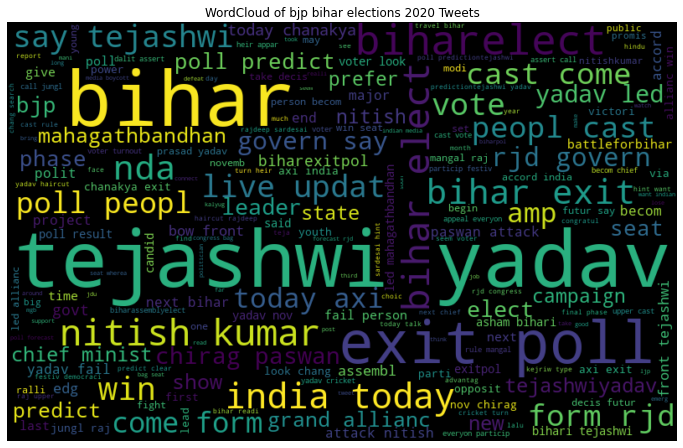

In [ ]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of rjd bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**




In [ ]:
from textblob import TextBlob

In [ ]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

529

In [ ]:
df1['Processed_Tweet']

1      [per, exit, poll, conduct, today, chanakya, re...
3      [peopl, bihar, give, decis, thought, win, cann...
5          [tejashwi, yadav, cricket, turn, heir, appar]
7      [heartbeat, young, heart, warmest, birthday, w...
9      [tejashwi, yadav, win, bihar, old, team, delhi...
                             ...                        
745    [tejashwi, bihar, kejriw, bihar, mani, state, ...
746      [voter, bihar, look, chang, type, burden, past]
747    [tejashwi, yadav, popular, elect, bihar, show,...
748    [decis, lead, tejashwi, bharelect, biharelect,...
749    [true, contest, bihar, elect, bihari, desper, ...
Name: Processed_Tweet, Length: 529, dtype: object



```
**# Classifying tweets as neutral, positive, negative**
```




In [ ]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 201
Negative Tweets: 47
Neutral Tweets 281


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,0.775,0.225,0.4404
1,0.000,0.648,0.352,0.5859
2,0.000,1.000,0.000,0.0000
3,0.000,0.597,0.403,0.6597
4,0.000,0.542,0.458,0.8225
...,...,...,...,...
524,0.208,0.615,0.177,-0.1027
525,0.326,0.674,0.000,-0.4404
526,0.000,0.551,0.449,0.6908
527,0.000,0.769,0.231,0.4588


In [ ]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.775,0.225,0.4404,Positive
1,0.0,0.648,0.352,0.5859,Positive
2,0.0,1.000,0.000,0.0000,Neutral
3,0.0,0.597,0.403,0.6597,Positive
4,0.0,0.542,0.458,0.8225,Positive


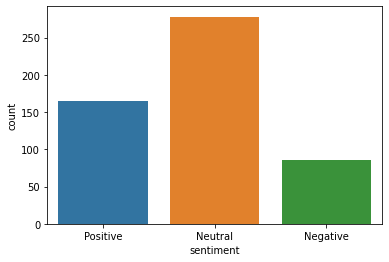

In [ ]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)